In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
ds = pd.read_csv('../datasets/titanic.csv')

In [8]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [10]:
columns_to_drop = ["PassengerId", "Name", "Ticket", "Cabin", "Embarked"]
ds = ds.drop(columns_to_drop, axis=1)
ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [12]:
def quantify_sex(sex):
    if sex.lower().startswith('m'):
        return 0
    elif sex.lower().startswith('f'):
        return 1
    else:
        return sex
    
ds['Sex'] = ds['Sex'].apply(quantify_sex)

In [13]:
ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [14]:
ds = ds.dropna()
ds = ds.reset_index(drop=True)
ds.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,0.365546,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,0.481921,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,1.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,1.000000,80.000000,5.000000,6.000000,512.329200


In [15]:
ds.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Survived,1.000000,-0.359653,0.538826,-0.077221,-0.017358,0.093317,0.268189
Pclass,-0.359653,1.000000,-0.155460,-0.369226,0.067247,0.025683,-0.554182
Sex,0.538826,-0.155460,1.000000,-0.093254,0.103950,0.246972,0.184994
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.017358,0.067247,0.103950,-0.308247,1.000000,0.383820,0.138329
Parch,0.093317,0.025683,0.246972,-0.189119,0.383820,1.000000,0.205119
Fare,0.268189,-0.554182,0.184994,0.096067,0.138329,0.205119,1.000000


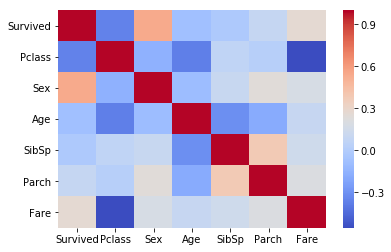

In [16]:
plt.figure()
sns.heatmap(ds.corr(), cmap='coolwarm')
plt.show()

In [21]:
[each for each in ds.columns]

# columns_to_keep = []
# for each in ds.columns:
    
#     if each == 'Survived':
#         continue
#     columns_to_keep.append(each)

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [18]:
X = ds[[each for each in ds.columns if each != "Survived"]]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 6 columns):
Pclass    714 non-null int64
Sex       714 non-null int64
Age       714 non-null float64
SibSp     714 non-null int64
Parch     714 non-null int64
Fare      714 non-null float64
dtypes: float64(2), int64(4)
memory usage: 33.5 KB


In [19]:
y = pd.DataFrame(ds['Survived'], columns=['Survived'])
y.info()
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 1 columns):
Survived    714 non-null int64
dtypes: int64(1)
memory usage: 5.7 KB


,Survived
0,0
1,1
2,1
3,1
4,0


In [56]:
class DecisionTree:
    output_column = None
    
    def __init__(self, depth=0, max_depth=10):
        self.data = None
        self.left = None
        self.right = None
        self.feature = None # Feature on which data is split
        self.value = None # On what value
        self.depth = depth
        self.max_depth = max_depth

    def split_data(self, data, split_on, value):
        left_data, right_data = list(), list()
    
        for i in range(data.shape[0]):
            row = data.iloc[i]
            if row[split_on] <= value:
                left_data.append(row)
            else:
                right_data.append(row)
                
        left_data = pd.DataFrame(left_data, columns=data.columns).reset_index(drop=True)
        right_data = pd.DataFrame(right_data, columns=data.columns).reset_index(drop=True)
        
        return left_data, right_data


    @staticmethod
    def information_gain(parent, left, right):
        l = left.shape[0] / parent.shape[0]
        r = 1 - l
        if not (l and r):
            return -np.inf
        gain = DecisionTree.entropy(parent) - \
            (l * DecisionTree.entropy(left) + \
             r * DecisionTree.entropy(right))
        return gain
    
    @staticmethod
    def entropy(system):
        total = system.shape[0]
        klasses, counts = np.unique(system[DecisionTree.output_column].values, \
                                    return_counts=True)
        ent = 0
        for i,klass in enumerate(klasses):
            p = counts[i] / total
            ent += (-1 * p * np.log2(p))
        return ent
    
    def get_best_split(self, data):
        information_gains = []
        
        for col in data.columns:
            if col == DecisionTree.output_column:
                continue
            
            val = data[col].mean()
            left, right = self.split_data(data, col, val)
            gain = DecisionTree.information_gain(data, left, right)
            information_gains.append((gain, col, val))
        
        max_gain = sorted(information_gains, key=lambda x: x[0], reverse=True)[0]
        return max_gain # (Gain, Column, Value)
                                                      
    def create_tree(self, data):
        print(self.depth)
        
        self.data = data
        
        gain, col, val = self.get_best_split(data)
        left, right = self.split_data(data, col, val)
        self.feature = col
        self.value = val
        
        if left.shape[0] == 0 or right.shape[0] == 0:
            return
        
        if self.depth >= self.max_depth:
            return
        
        self.left = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.right = DecisionTree(depth=self.depth+1, max_depth=self.max_depth)
        self.left.create_tree(left)
        self.right.create_tree(right)
    
    def train(self, data, output_column):
        # Creation of Tree | Exhaustive Search
        
        self.data = data
        DecisionTree.output_column = output_column
        self.create_tree(data)
        
    @property
    def is_leaf_node(self):
        return not(self.right or self.left)
    
    def predict(self, test):
        # Tree Traversal
        print(self.depth)
        
        if self.is_leaf_node:
            # Take Decision
            survival = self.data[DecisionTree.output_column].sum()
            death = self.data.shape[0] - survival
            return ("Survived" if survival >= death else "Died")
      
        if test[self.feature] <= self.value:
            return self.left.predict(test)
        else:
            return self.right.predict(test)
    
    def score(self, labels, y_test):
        return (labels == y_test).sum() / y_test.shape[0]

In [57]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


In [58]:
split = int(0.8 * ds.shape[0])
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
X_test, y_test = X_test.reset_index(drop=True), y_test.reset_index(drop=True)

In [59]:
dt = DecisionTree(max_depth=5)
dt.train(ds[:split], output_column='Survived')

0
1
2
3
4
5
5
4
5
5
3
4
5
5
4
5
5
2
3
4
5
5
4
5
5
3
4
5
5
4
5
5
1
2
3
4
5
5
4
5
5
3
4
5
5
4
5
5
2
3
4
5
5
4
5
5
3
4
5
5
4
5
5


In [29]:
dt.feature, dt.value # Root

('Sex', 0.36777583187390545)

In [31]:
print(dt.left.feature, dt.left.value)
print(dt.right.feature, dt.right.value)
print('-'*20)
print(dt.left.left.feature, dt.left.left.value)
print(dt.left.right.feature, dt.left.right.value)
print('-'*20)
print(dt.right.left.feature, dt.right.left.value)
print(dt.right.right.feature, dt.right.right.value)

def print_tree():
    pass

Fare 28.257881994459833
Pclass 2.080952380952381
--------------------
Fare 12.418069696969695
SibSp 1.0721649484536082
--------------------
Age 30.830708661417322
SibSp 0.9036144578313253


In [33]:
testing_data = ds[split:]

In [36]:
for ix in testing_data.index[20:30]:
    print (dt.predict(testing_data.loc[ix]))
    print (testing_data.loc[ix])
    print ('-'*80)

Died
Survived     1.000
Pclass       3.000
Sex          0.000
Age         31.000
SibSp        0.000
Parch        0.000
Fare         7.925
Name: 591, dtype: float64
--------------------------------------------------------------------------------
Died
Survived     0.0
Pclass       1.0
Sex          0.0
Age         70.0
SibSp        1.0
Parch        1.0
Fare        71.0
Name: 592, dtype: float64
--------------------------------------------------------------------------------
Survived
Survived     0.00
Pclass       3.00
Sex          0.00
Age         16.00
SibSp        1.00
Parch        1.00
Fare        20.25
Name: 593, dtype: float64
--------------------------------------------------------------------------------
Survived
Survived     1.0
Pclass       2.0
Sex          1.0
Age         30.0
SibSp        0.0
Parch        0.0
Fare        13.0
Name: 594, dtype: float64
--------------------------------------------------------------------------------
Survived
Survived     0.0
Pclass       1.0
Sex 

In [37]:
labels = []
for ix in testing_data.index[:]:
    labels.append(dt.predict(testing_data.loc[ix]))

In [38]:
actual_labels = y_test['Survived'].values
actual_labels[:10]

array([0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
print(labels[:10])
preds = le.fit_transform(labels)
print(preds[:10])

['Died', 'Survived', 'Died', 'Died', 'Died', 'Survived', 'Died', 'Survived', 'Died', 'Died']
[0 1 0 0 0 1 0 1 0 0]


In [40]:
dt.score(actual_labels, preds)

0.8391608391608392

# SKLearn Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
DT = DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [63]:
DT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [64]:
DT.score(X_test, y_test)

0.8321678321678322

In [65]:
import pydotplus

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

In [66]:
dot_data = StringIO()
export_graphviz(DT, out_file=dot_data, filled=True,rounded=True)

In [67]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

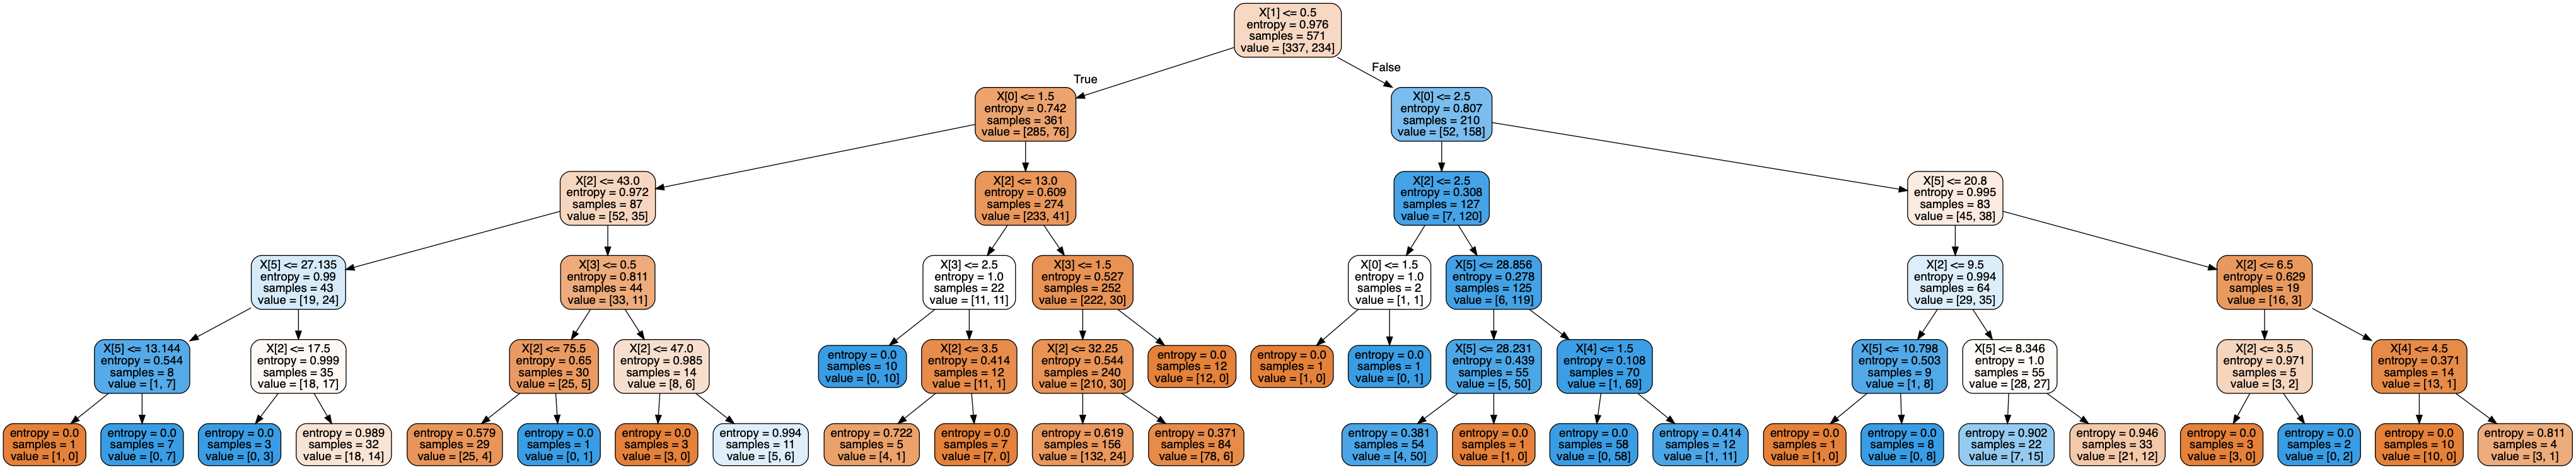

In [68]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=5)
forest.fit(X_train, y_train)

/Users/Pratulya/Desktop/codingblocks/ml-dwarka-june19/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
forest.score(X_train, y_train)

0.8581436077057794

In [81]:
forest.score(X_test, y_test)

0.8391608391608392

# Links
#### [Decision Tree -- Python Machine Learning Book](https://github.com/rasbt/python-machine-learning-book/blob/master/faq/decision-tree-binary.md)
#### [Decision Tree Example PDF](https://homepage.cs.uri.edu/faculty/hamel/courses/2015/spring2015/csc481/lecture-notes/ln481-018.pdf)